# Evaluate rankings with new samples added

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from utils.dataset_parser import generate_train_valid_test,generate_pos_neg_datasets

In [6]:
train_df,validation_df,test_df = generate_train_valid_test('exp26/','extended_train10perc.csv','valid.csv','test.csv',
                                                 left_prefix='ltable_',right_prefix='rtable_')

In [7]:
train_df.to_csv('exp26/merged_train.csv',index=False)
validation_df.to_csv('exp26/merged_validation.csv',index=False)
test_df.to_csv('exp26/merged_test.csv',index=False)

In [8]:
positives_df,negatives_df = generate_pos_neg_datasets('exp26','merged_train.csv','merged_validation.csv',
                                                     'merged_test.csv')

In [16]:
positives_df.to_csv('exp26/positives.csv',index=False)
negatives_df.to_csv('exp26/negatives.csv',index=False)

## Train models

In [10]:
import deepmatcher as dm

In [11]:
train,validation,test = dm.data.process('exp26',train='merged_train.csv',validation='merged_validation.csv',
                                       test='merged_test.csv',left_prefix='ltable_',right_prefix='rtable_')

In [12]:
model = dm.MatchingModel(attr_summarizer='hybrid')
model.run_train(train,validation,epochs=20,best_save_path='exp26/itunes_amazon_extendend.pth',pos_neg_ratio=5)

* Number of trainable parameters: 17757810
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    4.6 | Load Time:    1.3 || F1:  37.47 | Prec:  23.12 | Rec:  98.72 || Ex/s:  59.87

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    0.5 | Load Time:    0.4 || F1:  54.12 | Prec:  39.66 | Rec:  85.19 || Ex/s: 125.81

* Best F1: 54.11764705882353
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    4.2 | Load Time:    1.3 || F1:  52.01 | Prec:  36.41 | Rec:  91.03 || Ex/s:  64.18

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    0.5 | Load Time:    0.4 || F1:  61.02 | Prec:  56.25 | Rec:  66.67 || Ex/s: 125.54

* Best F1: 61.01694915254238
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    4.0 | Load Time:    1.3 || F1:  62.28 | Prec:  47.33 | Rec:  91.03 || Ex/s:  66.49

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.4 | Load Time:    0.3 || F1:  74.07 | Prec:  74.07 | Rec:  74.

88.13559322033898

In [13]:
model.run_eval(test)

===>  EVAL Epoch 13
Finished Epoch 13 || Run Time:    0.5 | Load Time:    0.4 || F1:  84.75 | Prec:  78.12 | Rec:  92.59 || Ex/s: 127.73



84.7457627118644

## Evaluate rankings

In [14]:
from utils.intermediate_layer_extraction import return_layer_input
from utils.ri_calculator import computeRi

In [17]:
negatives = return_layer_input(model,model.classifier,'exp26','negatives')
positives = return_layer_input(model,model.classifier,'exp26','positives')

In [18]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

In [19]:
neg_ri,neg_rinorms_df = computeRi(model.classifier,attributes,negatives,1)

100%|██████████| 437/437 [00:33<00:00, 13.20it/s]


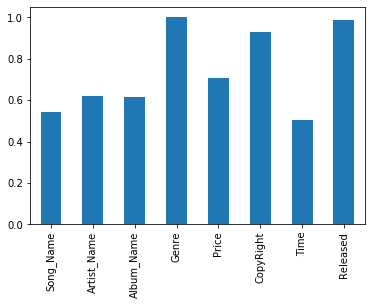

In [21]:
rankings = neg_rinorms_df.sum()
maxrank = max(rankings)
(rankings/maxrank).plot.bar()

In [22]:
pos_ri,pos_rinorms_df = computeRi(model.classifier,attributes,positives,0)

100%|██████████| 132/132 [00:23<00:00,  5.55it/s]


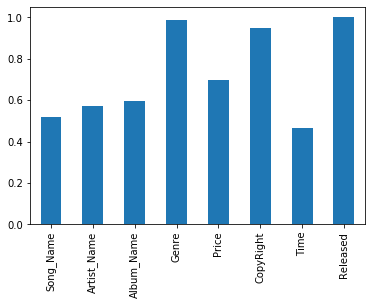

In [24]:
pos_rankings = pos_rinorms_df.sum()
maxrank_pos = max(pos_rankings)
(pos_rankings/maxrank_pos).plot.bar()